# Regression in Python.ipynb

+ Data Science Practicum for Business with Python
+ Wayne State University
+ Casey Whorton
+ 3.12.2020

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

## Import data into DataFrame "df"

+ Filter to Detroit Michigan

In [2]:
df = pd.read_csv('C:/Users/casey/OneDrive/Desktop/airfare.csv')
df = df[df.origin == '"DETROIT, MI"']

# Simple Linear Regression with statsmodels

+ The package we will use at first is called 'statsmodels', specifically the statmodels.api package
+ Look for it online for syntax and all of the methods associated
+ More than just ordinary least squares (OLS) is involved

**Remember the basic equation:** y ~ b0 + b1*_x_

+ To train a regression model using the OLS method (or really any model/algorithm) we will need observations for y and x
+ Lets use the fair of the plane ticket for the y and the distance traveled for the x
+ For each y there needs to be an observation for x

In [3]:
# TO DO: run the code in this cell
y = df.fair
x = df.distance
x = sm.add_constant(x) # this step adds a column of 1s, so that a constant is fitted to the regression equation
x.head()

C:\Users\casey\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,distance
2264,1.0,1127
2265,1.0,1127
2266,1.0,1127
2267,1.0,1127
2268,1.0,1085


In [4]:
# TO DO: print the first five observations for the target variable, y


It looks like you have everything you need to fit a regression model.  The code below shows the steps for creating a model instance, fitting it (training) and displaying a summary of the model.

In [4]:
model = sm.OLS(y,x) # Creating an OLS regression model with y as the target (endog in the literature) and x as the predictor (exog in the literature)
model_fit = model.fit() # Fitting/training model and assigning the resulting fitted model to "model_fit"
model_fit.summary() # Using the "summary" method, displaying the results of the fitted model (similar to R output)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fair   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     52.33
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           2.06e-11
Time:                        20:06:39   Log-Likelihood:                -839.88
No. Observations:                 156   AIC:                             1684.
Df Residuals:                     154   BIC:                             1690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.0652      8.414     15.577      0.000     114.443     147.687
distance       0.0509      0.007      7.234      0.000       0.037       0.065
==============================================================================
Omnibus:                       10.877   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.388
Skew:                           0.629   Prob(JB):                      0.00337
Kurtosis:                       2.586   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Some quick notes on these results**
+ For this course, we won't need to dive into all of the statistics displayed here.
+ Let's focus on the estimates for the coefficients, their p-values, and the R-squared values

+ R-squared
    + Proportion of variance explained by the model (the predictor variables)
    + Higher is better, with 1 being the best and 0 (or negative) being the worst
    + Not in the units of the target variable
    + Can be useful for comparing models and communicating with stakeholders (this is a commonly used metric)
    
+ Coefficient estimates
    + These are the resulting fitted coefficients from the data we passed to the model to be trained on
    + The value under 'coef' is the value we would place in our regression equation, if we wanted to write it out
    + For example, our regression equation here would be: fair = 131 + 0.0509*distance
    
+ p-values for the estimates
    + These values display the probability of getting this estimate under a null hypothesis of no relationship existing
    + For example, the p-value for 'distance' is very small, which means that there is a low probability of getting this coefficient just by chance
    + Viewing the p-values can tell us if a single explanatory variable is helpful in our model, but the p-values will all change based on the explantory variables used in the model
    

**Accessing model fit results programmatically with Python is easy**

+ After fitting a model, the object containing the fitted model is called something like a 'Results' or 'ResultsWrapper' (see below)
+ There are methods available for the fitted model that can return the errors or predictions generated from the model

Reference:
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html

In [6]:
# To Do: Run this cell
print(model_fit)

## Some ways to visualize results

+ For simple linear regression (a single explanatory variable) you can show the plot of the target versus the explanatory variable, not relevant for multiple regression
+ Plot the actual target values versus the predicted target values and look for a correlation (a higher correlation means a better or more consistent prediction)
+ Plot the errors the model makes (actual - predicted), and plot it in order
    + The errors should be evenly and randomly distributed around 0, but real-world data doesn't always give this type of result

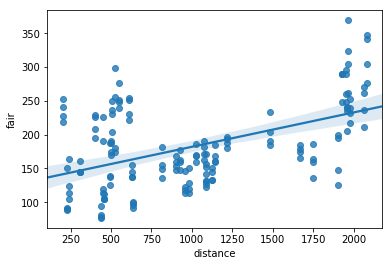

In [7]:
sns.regplot(x = 'distance', y = 'fair', data = df)
plt.show()

fair = 131.0652 + 0.0509*distance

+ the target variable is _fair_
+ the features, or explanatory variables, include _distance_
+ on average, the fair increases by 0.0509 dollars for every unit of distance (miles) while everything else is constant

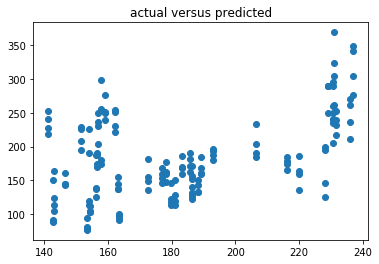

In [8]:
plt.scatter(x=model_fit.predict(),y=y)
plt.title('actual versus predicted')
plt.show()

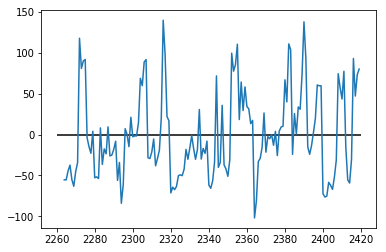

In [10]:
# plot the residuals (errors)
plt.plot(model_fit.resid)
plt.hlines(y=0, xmin=2260, xmax=2420)
plt.show()

## Accessing model elements using the results methods, attributes, and properties

+ Check out the documentation
+ A method is a procedure or function associated with an object, here it is a model results
+ We already used the summary method
+ Try the predict method
+ Try looking at the "params" from the model
+ Try looking at the r_squared from the model

In [11]:
# To Do: Run this code

model_fit.predict()[0:5]

array([188.42447623, 188.42447623, 188.42447623, 188.42447623,
       186.28686321])

In [5]:
# To Do: Create a variable for the squared residuals (errors)


In [6]:
# To Do: Compare what we did with the "errors" to the resid method


In [7]:
# Notice this is a shortcut of manually calculating the error


**To Do:**
+ Display the parameter of the coefficient for 'distance'
+ Display the r_squared value for the model
+ Display the adjusted r_squared value for the model

# Multiple Linear Regression in Python

+ Here, we are going to add another explanatory variable to the model
+ We'll follow some of the same steps with simple linear regression

**To Do**
+ Create a dataframe of explanatory variables
    + Use both distance and destination and years and bmktshr

In [8]:
explaners = ['distance','bmktshr','y98','y99','y100']

In [9]:
df[explaners].head()

,distance,bmktshr,y98,y99,y100
2264,1127,0.5812,0,0,0
2265,1127,0.5010,1,0,0
2266,1127,0.4394,0,1,0
2267,1127,0.5174,0,0,1
2268,1085,0.5482,0,0,0


**To Do**
+ Fit a model using the fair variable as the target and the explaners as explanatory variables
+ Display the actuals versus the predicted values
+ What the does the coefficient on y98 mean?

In [41]:
# Hint: set y as the target variable and x as the dataframe of explanatory variables and re-use the code from before



**To Do**
+ Use the pandas.get_dummies function to make indicator variables
+ Concatenate the destination variables with the other explanatory variables

In [10]:
# Use the pandas.get_dummies function to make indicator variables
# concatenate


**To Do**
+ Fit a model using the fair variable as the target and the remaining explaners and distance as the explanatory variables
+ Display the actuals versus the predicted values

**To Do**
+ Examine the difference between the relationship between fair and distance, and the relatiionship between lfair and ldist
+ Use the seaborn regplot
+ What is the difference?